# Rappi Data Analysis

## Introduction
The Notebook is using sample Rappi Sales Data from Kaggle - [Data-Set](https://www.kaggle.com/datasets/alexbonella/sales-simulation-at-rappi) .

Firstly, we will explore and clean the data with Python.

Secondly, we will display our findings on Data Vizualisations.

## Data Cleaning

In [328]:
import pandas as pd
import datetime
from matplotlib import pyplot as plt

In [330]:
df = pd.read_csv('/Users/olidare/Downloads/Sales_simulation.csv')

print(df.head(10))
print(df.shape)
print(df.info())
print(df.describe())



   Unnamed: 0  purchase_ID             Date at created  \
0           0            1  21-10-2020 14:42:55.373979   
1           1            2  21-10-2020 14:42:55.483563   
2           2            3  21-10-2020 14:42:55.739536   
3           3            4  21-10-2020 14:42:55.945560   
4           4            5  21-10-2020 14:42:56.201561   
5           5            6  21-10-2020 14:42:56.507789   
6           6            7  21-10-2020 14:42:56.613657   
7           7            8  21-10-2020 14:42:56.919591   
8           8            9  21-10-2020 14:42:57.025475   
9           9           10  21-10-2020 14:42:57.281396   

                   Category                    Name  Purchase Price  \
0     Saludable · Desayunos        Distrito Gourmet           10700   
1                   Postres       Toledo Pastelería           53900   
2         Postres · Helados                    Mahé            7500   
3  Hamburguesas · Saludable          Restaurant Inn           23000   
4     

### Date Column has incorrect Dtype

- Need to convert the column to a type of Date, so we can utilise it better. 

In [333]:
date_column = pd.to_datetime(
    df['Date at created'], 
    dayfirst=True  # Forces day-month interpretation
)
df = df.drop(columns=['Date at created'])
df.insert(1, 'Date', date_column)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23230 entries, 0 to 23229
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      23230 non-null  int64         
 1   Date            23230 non-null  datetime64[ns]
 2   purchase_ID     23230 non-null  int64         
 3   Category        23230 non-null  object        
 4   Name            23230 non-null  object        
 5   Purchase Price  23230 non-null  int64         
 6   Delivery Price  23230 non-null  int64         
 7   Total           23230 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 1.4+ MB


### Unknown Column

In the Dataset there is an index column but it is redundant as there is also a Purchase_ID column with the exact same number.

Can remove this redundant column.

In [336]:
df = df.drop(columns=['Unnamed: 0'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23230 entries, 0 to 23229
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            23230 non-null  datetime64[ns]
 1   purchase_ID     23230 non-null  int64         
 2   Category        23230 non-null  object        
 3   Name            23230 non-null  object        
 4   Purchase Price  23230 non-null  int64         
 5   Delivery Price  23230 non-null  int64         
 6   Total           23230 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 1.2+ MB


### Large Number of Similar Categories

In [339]:
print(df['Category'].value_counts())
print(df['Category'].unique())

Category
Postres · Desayunos                   1770
Típica                                1719
Desayunos · Típica                    1586
Saludable · Desayunos                 1538
Desayunos                             1337
                                      ... 
Hamburguesas · Pescados y Mariscos      86
Alta Cocina · Italiana                  81
Perros Calientes                        81
Hamburguesas · Panadería                81
Sushi · Desayunos                       77
Name: count, Length: 74, dtype: int64
['Saludable · Desayunos' 'Postres' 'Postres · Helados'
 'Hamburguesas · Saludable' 'Postres · Desayunos' 'Pollo · China'
 'Desayunos' 'Sushi · Asiática' 'Desayunos · Café'
 'Desayunos · Pescados y Mariscos' 'Hamburguesas' 'Saludable' 'Pizza'
 'Típica' 'Pollo · Sánduches' 'Helados' 'Pizza · Parrilla'
 'Pollo · Saludable' 'Mexicana' 'Sushi' 'Saludable · Típica'
 'Pizza · Italiana' 'Parrilla' 'Típica · Parrilla' 'Desayunos · Típica'
 'Pollo · Pescados y Mariscos' 'Alta Cocina · 

### Insights 

High Number of categories but as you can see there are lots of similar categories.

Típica                                17
Desayunos · Típica                    1586
Saludable · Desayunos                 1538
Desayunos                             1337

It would appear as if a restaurant can classify itself as more than one, e.g. Desayunos + Típica. Initially I thought I could standardise the categories but I think it could unintentionally manipulate the data.

### Convert COP to US Dollars

Colombian Pesos are very high denomination, which can make Vizualisations more extreme.
Todays exchange is 4300 COP -> $1.

Add Dollars column to the Data Set will also make these Vizualisations be understood by a wider audience.


In [343]:
exchange_rate = 4300
cols_to_convert = ['Purchase Price', 'Delivery Price', 'Total']
df[cols_to_convert] = df[cols_to_convert] / exchange_rate
df[cols_to_convert] = df[cols_to_convert].round(2)

df = df.rename(columns={
    'Purchase Price': 'Purchase Price (USD)',
    'Delivery Price': 'Delivery Price (USD)',
    'Total': 'Total (USD)'
})
df.head(5)

,Date,purchase_ID,Category,Name,Purchase Price (USD),Delivery Price (USD),Total (USD)
0,2020-10-21 14:42:55.373979,1,Saludable · Desayunos,Distrito Gourmet,2.49,0.86,3.35
1,2020-10-21 14:42:55.483563,2,Postres,Toledo Pastelería,12.53,1.58,14.12
2,2020-10-21 14:42:55.739536,3,Postres · Helados,Mahé,1.74,1.40,3.14
3,2020-10-21 14:42:55.945560,4,Hamburguesas · Saludable,Restaurant Inn,5.35,1.42,6.77
4,2020-10-21 14:42:56.201561,5,Postres · Desayunos,Maria Luisa - Postres,2.09,1.00,3.09


## Rappi Commission

### Colombian Food Delivery Economics
- Restaurant Commission: 20-30% (Rappi takes ~25% on average)
- Delivery Fee: 100% kept by platform (minus rider payment)
- Rider Pay: ~60% Rappi 40%

#### Missing 
Additional Fees: Sometimes "service fees" (5-10%) or dynamic pricing.

In [346]:
df['Rappi Commission (USD)'] = df['Purchase Price (USD)']* 0.25 + df['Delivery Price (USD)']*0.4
df['Rappi Commission (USD)'] = df['Rappi Commission (USD)'].round(2)
df.head(5)


,Date,purchase_ID,Category,Name,Purchase Price (USD),Delivery Price (USD),Total (USD),Rappi Commission (USD)
0,2020-10-21 14:42:55.373979,1,Saludable · Desayunos,Distrito Gourmet,2.49,0.86,3.35,0.97
1,2020-10-21 14:42:55.483563,2,Postres,Toledo Pastelería,12.53,1.58,14.12,3.76
2,2020-10-21 14:42:55.739536,3,Postres · Helados,Mahé,1.74,1.40,3.14,0.99
3,2020-10-21 14:42:55.945560,4,Hamburguesas · Saludable,Restaurant Inn,5.35,1.42,6.77,1.91
4,2020-10-21 14:42:56.201561,5,Postres · Desayunos,Maria Luisa - Postres,2.09,1.00,3.09,0.92


### Top 10 Categories for Rappi

In [349]:
(df[['Rappi Commission (USD)', 'Category']]
    .groupby(['Category']).agg('sum')
    .sort_values('Rappi Commission (USD)', ascending=False)
    .head(10) )   

,Rappi Commission (USD)
Category,
Postres · Desayunos,3868.07
Típica,3654.47
Desayunos · Típica,3379.21
Saludable · Desayunos,3231.88
Desayunos,2810.33
Desayunos · Panadería,2607.97
Parrilla,2374.70
Desayunos · Café,1673.30
Típica · Parrilla,1553.36


### Bottom 10 Categories for Rappi

In [352]:
(df[['Rappi Commission (USD)', 'Category']]
    .groupby(['Category']).agg('sum')
    .sort_values('Rappi Commission (USD)', ascending=True)
    .head(10) )  

,Rappi Commission (USD)
Category,
Sushi · Desayunos,150.11
China,150.59
Panadería,166.50
Alta Cocina · Italiana,169.03
Hamburguesas · Panadería,173.67
Comida Rápida,180.63
Sánduches,181.76
Perros Calientes,181.93
Pollo · Sánduches,184.22


### Most Profitable Category per restaurant

In [355]:
df.groupby('Category').agg(
    Total_Profit=('Rappi Commission (USD)', 'sum'),      
    Restaurant_Count=('Name', 'nunique')      
    ).reset_index()


,Category,Total_Profit,Restaurant_Count
0,Alta Cocina · Italiana,169.03,1
1,Alta Cocina · Parrilla,224.67,1
2,Alta Cocina · Postres,202.40,1
3,Asiática,421.80,2
4,Café · Helados,206.84,1
...,...,...,...
69,Sánduches · China,211.00,1
70,Sánduches · Pescados y Mariscos,231.06,1
71,Típica,3654.47,18
72,Típica · Parrilla,1553.36,8


In [357]:
def get_profitability_ranking(most_profitable):
    category_stats = df.groupby('Category').agg(
    Total_Profit=('Rappi Commission (USD)', 'sum'),      # Sum of all orders per category
    Restaurant_Count=('Name', 'nunique')      # Unique restaurants per category
    ).reset_index()


    category_stats['Profit_per_Restaurant'] = (
        category_stats['Total_Profit'] / category_stats['Restaurant_Count']
    )
    
    
    restaurants = category_stats.sort_values(
        by='Profit_per_Restaurant', 
        ascending=most_profitable
    )
    return restaurants[ ['Category', 'Profit_per_Restaurant'] ].head(10)

In [359]:
get_profitability_ranking(most_profitable=False)

,Category,Profit_per_Restaurant
25,Hamburguesas · Alitas,253.620
29,Hamburguesas · Saludable,245.830
26,Hamburguesas · Desayunos,233.210
70,Sánduches · Pescados y Mariscos,231.060
41,Peruana · Internacional,230.280
59,Postres · Saludable,226.850
73,Típica · Pescados y Mariscos,225.675
44,Pizza · Italiana,225.325
1,Alta Cocina · Parrilla,224.670
8,Crepes,220.750


### Least Profitable Category per restaurant

In [362]:
get_profitability_ranking(most_profitable=True)

,Category,Profit_per_Restaurant
67,Sushi · Desayunos,150.110000
5,China,150.590000
35,Panadería,166.500000
0,Alta Cocina · Italiana,169.030000
12,Desayunos · Empanadas,172.505000
27,Hamburguesas · Panadería,173.670000
21,Desayunos · Sánduches,180.503333
6,Comida Rápida,180.630000
68,Sánduches,181.760000
39,Perros Calientes,181.930000


### Top 10 Restaurants for Rappi

In [366]:
(df[['Rappi Commission (USD)', 'Name']]
    .groupby(['Name']).agg('sum')
    .sort_values('Rappi Commission (USD)', ascending=False)
    .head(10) )   

,Rappi Commission (USD)
Name,
Arigato,263.21
D'Porco - Lechona,259.05
Tremenda Sal y Dulce,257.43
Bagel Shop,254.86
Beer,253.62
Casa Vieja,250.67
Choclofee,249.50
Beiked,249.31
Puro Verde,247.10


### Bottom 10 Restaurants for Rappi

In [382]:
(df[['Rappi Commission (USD)', 'Name']]
    .groupby(['Name']).agg('sum')
    .sort_values('Rappi Commission (USD)', ascending=True)
    .head(10) )

,Rappi Commission (USD)
Name,
Maki Roll,150.11
China Food Col,150.59
Beraca Parrilla Bbq,153.51
Tu Sushi,156.10
La Cesta,165.33
Sunny Breakfast Brunch,165.60
La Parilla de David,166.26
Boul,166.50
El Santandereano,167.34


### Sales Across the Day

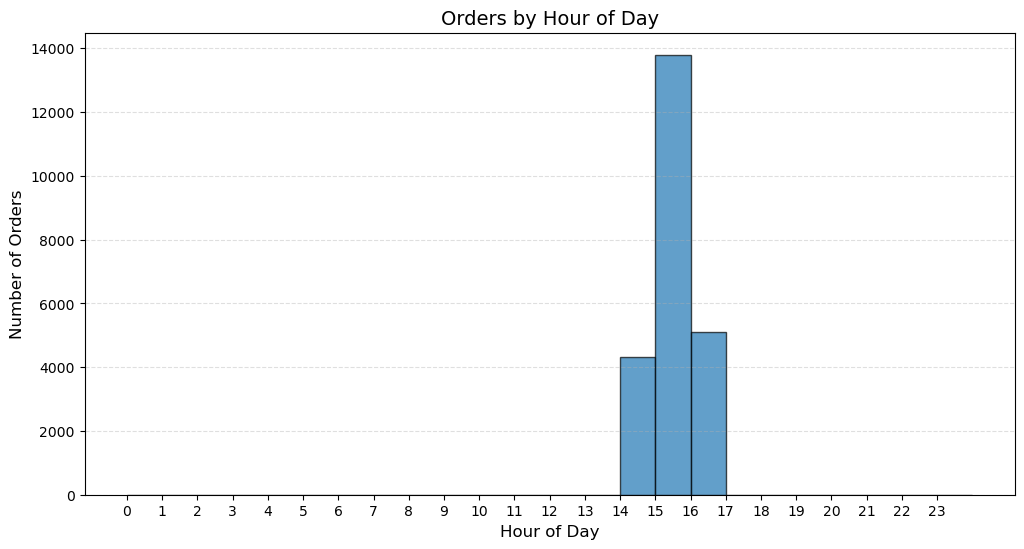

In [373]:
# Convert to datetime and extract hour
df['Hour'] = pd.to_datetime(df['Date']).dt.hour

# Create histogram (orders per hour)
plt.figure(figsize=(12, 6))
plt.hist(df['Hour'], bins=24, range=(0, 24), edgecolor='black', alpha=0.7)
plt.title('Orders by Hour of Day', fontsize=14)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show();

## Considerations
- All of the results come in between 2pm-5pm, evidently certain restaurants are more popular at this time than others.
- All of the Data was collected on 21-10-2020, Wednesday. We would want data for other days before drawing any major conclusions.
- Restaurants being having classifications means there is a high number of category possibilities.
- With more complete Data we can confidently highlight categories which need more promotion, discounts.
-  We can see that 3-4 is a busy period, need more drivers then.
-  We can use the median Delivery Fee to calculate what the Delivery Drivers should be compensated whilst staying profitable.